# Leitura dos Dados

## Carregamento dos dados

Inicialmente iremos realizar a leitura dos dados que serão utilizados para pergunta e resposta. Estamos considerando como 'other' a intenção para Q&A.

In [1]:
import numpy as np
import pandas as pd

/var/folders/9s/57nzd20544q42fhd798g3nmh0000gn/T/ipykernel_44947/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
qa_data = pd.read_csv("q&a_intent_train.csv", names= ["target", "text"])

qa_data

,target,text
0,other,What is the principle behind flight?
1,other,What are the four forces acting on an airplane?
2,other,What is the difference between IFR and VFR?
3,other,What is a black box in aviation?
4,other,What is the busiest airport in the world by pa...
...,...,...
94,other,"What is ""ACARS""?"
95,other,"What is ""Alternate Airport""?"
96,other,"at does ""pan-pan"" mean?"
97,other,"What is ""decision height"" (DH)?"


Leitura dos dados de treino e teste disponibilizados pelo ATIS dataset.

In [3]:
atis_train_data = pd.read_csv("atis_intents_train.csv", names= ["target", "text"])
atis_test_data = pd.read_csv("atis_intents_test.csv", names= ["target", "text"])

print("ATIS train dataset size is:", len(atis_train_data))
print("ATIS test dataset size is:", len(atis_test_data))

ATIS train dataset size is: 4834
ATIS test dataset size is: 800


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
qa_train_data, qa_test_data = train_test_split(qa_data, test_size=0.20, random_state=42)

print("Q&A train dataset size is:", len(qa_train_data))
print("Q&A test dataset size is:", len(qa_test_data))

Q&A train dataset size is: 79
Q&A test dataset size is: 20


In [5]:
train_data = pd.concat([qa_train_data, atis_train_data], ignore_index=True)

train_data

,target,text
0,other,"What is a ""taxiway""?"
1,other,"What is a ""slot-restricted"" airport?"
2,other,"What is ""NextGen"" in U.S. aviation?"
3,other,"What does the term ""gate hold"" mean in aviation?"
4,other,"What does ""direct flight"" mean as opposed to ""..."
...,...,...
4908,atis_airfare,what is the airfare for flights from denver t...
4909,atis_flight,do you have any flights from denver to baltim...
4910,atis_airline,which airlines fly into and out of denver
4911,atis_flight,does continental fly from boston to san franc...


In [6]:
test_data = pd.concat([qa_test_data, atis_test_data], ignore_index=True)

test_data

,target,text
0,other,"What is ""yaw"" in aviation?"
1,other,"What is a ""deadhead"" flight?"
2,other,"What is ""Alternate Airport""?"
3,other,What is the purpose of ailerons on an aircraft?
4,other,"What is ""decision height"" (DH)?"
...,...,...
815,atis_flight,please find all the flights from cincinnati t...
816,atis_flight,find me a flight from cincinnati to any airpo...
817,atis_flight,i'd like to fly from miami to chicago on amer...
818,atis_flight,i would like to book a round trip flight from...


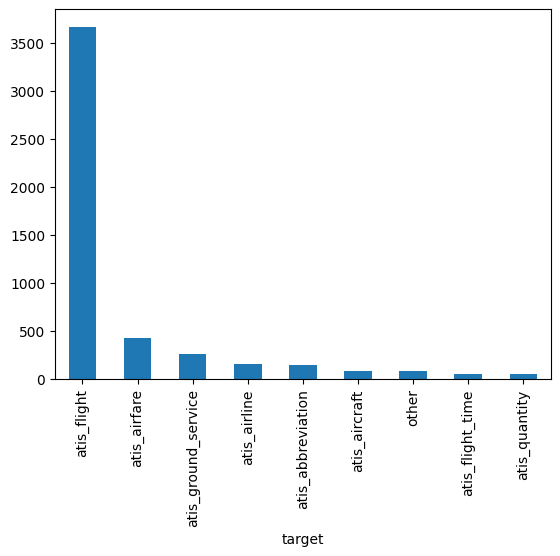

In [8]:
train_data['target'].value_counts().plot(kind='bar')
plt.show()

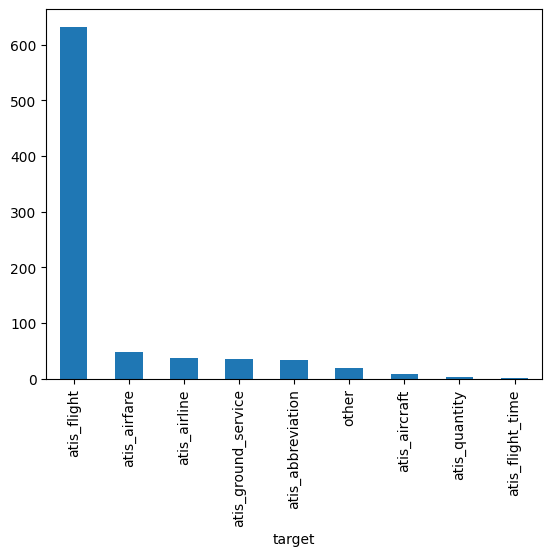

In [9]:
test_data['target'].value_counts().plot(kind='bar')
plt.show()

## Correção da distribuição de classes entre datasets

Agora que temos nossos dados de treino e de teste carregados, veremos como está a distribuição de classes entre estes datasets.

In [7]:
def check_stratification(train_data, test_data, target_column):
    # Calculate the distribution in the training data
    train_distribution = train_data[target_column].value_counts(normalize=True) * 100

    # Calculate the distribution in the testing data
    test_distribution = test_data[target_column].value_counts(normalize=True) * 100

    # Print the distributions
    print("Training Data Distribution:\n", train_distribution)
    print("\nTesting Data Distribution:\n", test_distribution)

check_stratification(train_data, test_data, 'target')

Training Data Distribution:
 target
atis_flight            74.618359
atis_airfare            8.609811
atis_ground_service     5.190311
atis_airline            3.195604
atis_abbreviation       2.992062
atis_aircraft           1.648687
other                   1.607979
atis_flight_time        1.099125
atis_quantity           1.038062
Name: proportion, dtype: float64

Testing Data Distribution:
 target
atis_flight            77.073171
atis_airfare            5.853659
atis_airline            4.634146
atis_ground_service     4.390244
atis_abbreviation       4.024390
other                   2.439024
atis_aircraft           1.097561
atis_quantity           0.365854
atis_flight_time        0.121951
Name: proportion, dtype: float64


De acordo com o que foi mostrado acima, os dados podem ser melhor divididos para que possuam uma relação parecida de quantidade de classes. Enquanto a maior classe (`atis_flight`) é dominante em ambos datasets, percemos que há uma diferença notável nas proporções de outras classes. Por exemplo, `atis_airfare` possui uma propoção significativamente maior no dataset de treinamento quando comparado com o de testes. Por isso, iremos estratificar os dados.

In [8]:
from sklearn.model_selection import train_test_split

# Improve data stratification
data = pd.concat([test_data, train_data], ignore_index=True)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Splitting the data into train and test sets while stratifying on the target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.reset_index()

test_data = pd.concat([X_val, y_val], axis=1)
test_data = test_data.reset_index()

check_stratification(train_data, test_data, 'target')

Training Data Distribution:
 target
atis_flight            74.967292
atis_airfare            8.220672
atis_ground_service     5.080680
atis_airline            3.401657
atis_abbreviation       3.139991
other                   1.722634
atis_aircraft           1.569996
atis_flight_time        0.959442
atis_quantity           0.937636
Name: proportion, dtype: float64

Testing Data Distribution:
 target
atis_flight            74.978204
atis_airfare            8.195292
atis_ground_service     5.056670
atis_airline            3.400174
atis_abbreviation       3.138622
other                   1.743679
atis_aircraft           1.569311
atis_quantity           0.959024
atis_flight_time        0.959024
Name: proportion, dtype: float64


Como podemos notar, agora os dados estão melhores distribuidos. Isso será útil para a avaliação dos modelos, gerando uma avaliação mais justa.

Com os dados carregados, iremos seguir para o treinamento dos modelos. Não fizemos um pré tratamento dos dados porque não temos uma quantidade significativa de dados. Além disso, os textos que serão colocados para treinamento são curtos. Esse ponto foi discutido em acompanhamento com o professor.

# SVM

Iremos construir o modelo SVM utilizando bag of words para representar os textos.

## Bag of Words

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_data["text"])

TfidfVectorizer()

In [11]:
X_train = tfidf_vectorizer.transform(train_data["text"])

X_train

<4586x955 sparse matrix of type '<class 'numpy.float64'>'
	with 47260 stored elements in Compressed Sparse Row format>

In [12]:
X_val = tfidf_vectorizer.transform(test_data["text"])

X_val

<1147x955 sparse matrix of type '<class 'numpy.float64'>'
	with 11774 stored elements in Compressed Sparse Row format>

## Classificador SVM

### Definição e treinamento

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier using the BoW features from the training data
svm_classifier.fit(X_train, train_data['target'])

SVC(kernel='linear', random_state=42)

### Avaliação do Modelo

In [14]:
# Predict the target values for the test data
y_test_pred = svm_classifier.predict(X_val)

# Evaluate the predictions against the actual target values from the test data
print("Accuracy on test data:", accuracy_score(test_data['target'], y_test_pred))
print("\nClassification Report on test data:\n", classification_report(test_data['target'], y_test_pred))

Accuracy on test data: 0.972101133391456

Classification Report on test data:
                      precision    recall  f1-score   support

  atis_abbreviation       0.83      0.94      0.88        36
      atis_aircraft       0.93      0.78      0.85        18
       atis_airfare       0.94      0.97      0.95        94
       atis_airline       0.93      0.97      0.95        39
        atis_flight       0.98      0.99      0.99       860
   atis_flight_time       1.00      0.73      0.84        11
atis_ground_service       0.98      0.98      0.98        58
      atis_quantity       0.91      0.91      0.91        11
              other       1.00      0.65      0.79        20

           accuracy                           0.97      1147
          macro avg       0.94      0.88      0.90      1147
       weighted avg       0.97      0.97      0.97      1147



Considerando que o tempo de treinamento do modelo levou menos de 1 segundo para ser realizado, podemos dizer que ele apresentou um bom desempenho na identificação das intenções dos nossos dados. Tivemos um valor de 0.97 para acurácia, o que reforça que teve o modelo teve um bom desempenho considerando suas limitações. Os dados, no entanto, estão desbalanceados. Mesmo assim, o modelo apresentou uma boa média para o f1-score de 0.90. Percebemos que `other` foi o mais penalizado no treinamento, apresentando um recall de 0.65.

# Word Embeddings

Iremos seguir para o treinamento de deep learning. Estes, por sua vez, dependem de uma entrada dos dados diferente do BoW utilizado no SVM. Para tanto, iremos criar word embeddings a partir dos nossos dados.

Para obtenção da representação vetorial dos dados, iremos utilizar [GloVe](https://nlp.stanford.edu/projects/glove/) no treinamento dos modelos CNN e LSTM.

## Tokenization

Primeiramente, realizaremos a tokenização do nosso vocabulário.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data["text"])

In [17]:
WORD_INDEX = tokenizer.word_index
MAX_VOCAB_SIZE = len(WORD_INDEX) + 1

In [18]:
# Get the maximum length of a sequence in the training data or test data
max_seq_length_train = max([len(seq.split()) for seq in train_data["text"]])
max_seq_length_test = max([len(seq.split()) for seq in test_data["text"]])
INPUT_LENGTH = max(max_seq_length_train, max_seq_length_test)

In [19]:
train_data_tokens = tokenizer.texts_to_sequences(train_data["text"])
padded_train_data = pad_sequences(train_data_tokens, maxlen=INPUT_LENGTH)

In [20]:
test_data_tokens = tokenizer.texts_to_sequences(test_data["text"])
padded_test_data = pad_sequences(test_data_tokens, maxlen=INPUT_LENGTH)

## Encode dos Targets

Ems seguida, realizaremos o encode dos targets por meio do one hot encoding.

In [21]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()

In [22]:
# One hot encoding the labels
encoded_train_labels = binarizer.fit_transform(train_data['target'])
encoded_test_labels = binarizer.fit_transform(test_data['target'])

In [23]:
# X_train: The subsert of `padded_train_data` that will be used for training the model.
# X_val: The subset of `padded_train_data` that will be used for validating the model.
# y_train: The subset of `encoded_train_labels` that corresponds to `X_train`, to be used as the target labels for training the model.
# y_val: The subset of `encoded_train_labels` that corresponds to `X_test`, to be used as the target labels for validating the model.

X_train, X_val, y_train, y_val  = train_test_split(padded_train_data, encoded_train_labels, test_size=0.2, random_state=1)

## Construção da Embedding Matrix usando GloVe

Para incorporar as palavras em nosso modelo, utilizamos o GloVe (Global Vectors for Word Representation) com vetores de 300 dimensões. A escolha de 300 dimensões é feita com base no equilíbrio entre a complexidade computacional e a riqueza da representação semântica das palavras. Essa dimensionalidade é amplamente reconhecida por proporcionar um bom desempenho em diversas tarefas de PLN.

O código a seguir carrega os vetores GloVe de um [arquivo pré-treinado](https://nlp.stanford.edu/data/glove.42B.300d.zip) e constrói uma matriz de embedding, onde cada linha corresponde a um vetor de embedding de uma palavra específica no vocabulário:

In [24]:
embedded_dim = 300
embedded_index = dict()

with open ('glove.42B.300d.txt','r',encoding='utf8') as glove : 
    for line in glove:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],dtype='float32')
        embedded_index[word] = vector

embedded_matrix = np.zeros((MAX_VOCAB_SIZE, embedded_dim))

for x , i in WORD_INDEX.items():
    vector = embedded_index.get(x)
    if vector is not None:
        embedded_matrix[i] = vector

# CNN

Com nossa representação vetorial dos dados pronta, o passo seguinte é a construção do nosso modelo CNN.

## Construção do Modelo

In [25]:
from keras.layers import Flatten, Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense
from keras.models import Sequential

Faremos a construção do modelo pensando em capturar padrões locais e globais nas sequências de palavras. Com isso em mente, chegamos na arquitetura apresentada abaixo:

1. **Camada de Embedding**: Inicializa os pesos com uma matriz de embedding pré-treinada (GloVe).

2. **Camada Conv1D**: Aplica filtros convolucionais para capturar relações importantes entre palavras adjacentes. Usamos 32 filtros e um kernel de tamanho 9, com a função de ativação SELU, para extrair características relevantes para a identificação de intenções.

3. **MaxPooling1D**: Reduz a dimensionalidade das características, selecionando os valores máximos de regiões de tamanho 2, o que ajuda a destacar as características mais significativas.

4. **Flatten**: Transforma a saída da camada de pooling em um vetor unidimensional, permitindo sua passagem para camadas densas.

5. **Camadas Densas**: Duas camadas densas sequenciais, a primeira com 10 unidades e ativação SELU, seguida por uma camada de saída com 9 unidades e ativação `sigmoid`, projetada para a classificação de intenções.

In [26]:
model = Sequential()
model.add(Embedding(MAX_VOCAB_SIZE, 300, input_length= INPUT_LENGTH, weights=[embedded_matrix], trainable=False))
model.add(Conv1D(filters=32, kernel_size=9, activation='selu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='selu'))
model.add(Dense(9, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 300)           297300    
                                                                 
 conv1d (Conv1D)             (None, 38, 32)            86432     
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 10)                6090      
                                                                 
 dense_1 (Dense)             (None, 9)                 99        
                                                        

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, verbose=2, validation_data=(X_val, y_val))

Epoch 1/60
115/115 - 1s - loss: 0.6683 - accuracy: 0.8242 - val_loss: 0.3544 - val_accuracy: 0.9172 - 804ms/epoch - 7ms/step
Epoch 2/60
115/115 - 1s - loss: 0.2358 - accuracy: 0.9460 - val_loss: 0.2259 - val_accuracy: 0.9455 - 534ms/epoch - 5ms/step
Epoch 3/60
115/115 - 0s - loss: 0.1092 - accuracy: 0.9755 - val_loss: 0.2038 - val_accuracy: 0.9532 - 462ms/epoch - 4ms/step
Epoch 4/60
115/115 - 0s - loss: 0.0563 - accuracy: 0.9869 - val_loss: 0.1748 - val_accuracy: 0.9597 - 487ms/epoch - 4ms/step
Epoch 5/60
115/115 - 0s - loss: 0.0280 - accuracy: 0.9967 - val_loss: 0.1601 - val_accuracy: 0.9684 - 471ms/epoch - 4ms/step
Epoch 6/60
115/115 - 0s - loss: 0.0171 - accuracy: 0.9992 - val_loss: 0.1713 - val_accuracy: 0.9673 - 463ms/epoch - 4ms/step
Epoch 7/60
115/115 - 0s - loss: 0.0107 - accuracy: 0.9995 - val_loss: 0.1798 - val_accuracy: 0.9651 - 442ms/epoch - 4ms/step
Epoch 8/60
115/115 - 0s - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.1777 - val_accuracy: 0.9662 - 437ms/epoch - 4ms/step


## Avaliação do Modelo

In [29]:
def acc(y_true, y_pred):
    return np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred, axis=-1)).mean()

predictions = model.predict(padded_test_data)
print(acc(encoded_test_labels, predictions))

36/36 [==============================] - 0s 2ms/step
0.9572798605056669


In [32]:
# Convert the one-hot encoded test labels back to categorical labels
y_test_labels = np.argmax(encoded_test_labels, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

# Generate the classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=binarizer.classes_))

                     precision    recall  f1-score   support

  atis_abbreviation       0.85      0.92      0.88        36
      atis_aircraft       0.93      0.78      0.85        18
       atis_airfare       0.91      0.93      0.92        94
       atis_airline       0.88      0.90      0.89        39
        atis_flight       0.97      0.98      0.98       860
   atis_flight_time       0.83      0.45      0.59        11
atis_ground_service       0.95      0.98      0.97        58
      atis_quantity       1.00      0.64      0.78        11
              other       0.88      0.70      0.78        20

           accuracy                           0.96      1147
          macro avg       0.91      0.81      0.85      1147
       weighted avg       0.96      0.96      0.96      1147



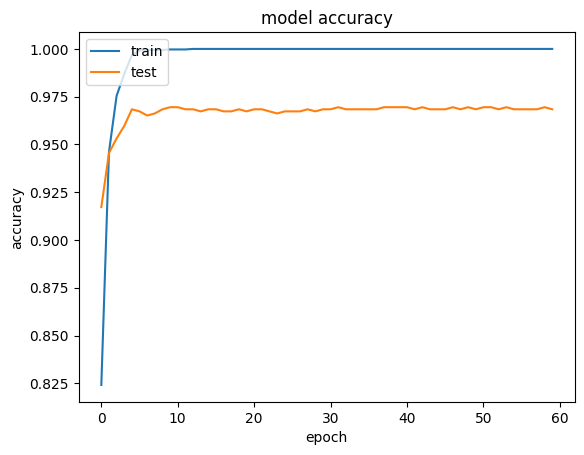

In [33]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

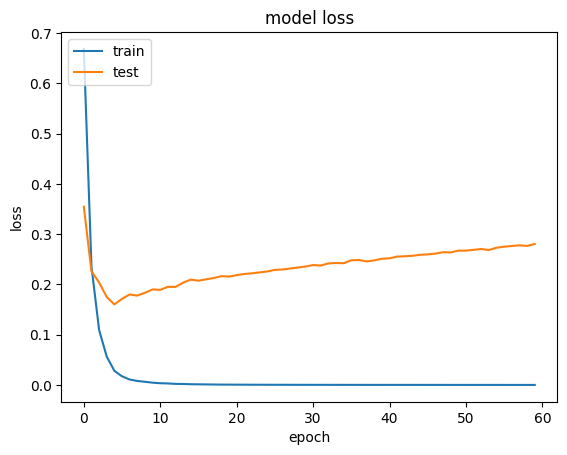

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Diferente do que inicialmente esperamos, o modelo CNN não se saiu melhor do que o SVM. Pelo o que podemos ver, os gráficos de acurácia e de loss apontam para um overfitting no treinamento. Por mais que acurácia esteja alta (0.96), vemos que o f1-score saiu bastante penalizado tendo uma média de (0.85). Vemos que para `atis_flight_time` o recall foi significantemente baixo. Se também considerarmos que o treinamento do modelo foi consideravelmente quando comparado com o SVM, vemos mais uma penalização para o CNN.

# LSTM

Em seguida, temos a implementação de um modelo baseado em LSTM para realizar a identificação de intenções nos nossos dados.

## Construção do Modelo

Abaixo, detalhamos os componentes principais da nossa arquitetura:

- **Camada de Embedding**: Começamos com uma camada de embedding que usa vetores GloVe pré-treinados para converter palavras em representações vetoriais.

- **Camada LSTM**: A seguir, uma camada LSTM com 128 unidades e dropout de 0.2 é usada para processar a sequência de embeddings. Esta camada é capaz de aprender as dependências de longo prazo necessárias para entender o contexto e a intenção por trás de uma entrada de texto.

- **Camada Densa de Saída**: Por fim, uma camada densa com ativação `softmax` classifica a entrada em uma das possíveis intenções, com cada unidade de saída correspondendo a uma intenção específica.

In [35]:
from keras.layers import LSTM

# Definying the model architecture
model = Sequential()
model.add(Embedding(MAX_VOCAB_SIZE, 300, input_length= INPUT_LENGTH, weights=[embedded_matrix], trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 300)           297300    
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 518109 (1.98 MB)
Trainable params: 220809 (862.54 KB)
Non-trainable params: 297300 (1.13 MB)
_________________________________________________________________


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
115/115 [==============================] - 12s 96ms/step - loss: 0.6448 - accuracy: 0.8252 - val_loss: 0.2741 - val_accuracy: 0.9227
Epoch 2/10
115/115 [==============================] - 10s 91ms/step - loss: 0.1933 - accuracy: 0.9487 - val_loss: 0.1400 - val_accuracy: 0.9542
Epoch 3/10
115/115 [==============================] - 10s 90ms/step - loss: 0.1072 - accuracy: 0.9697 - val_loss: 0.1093 - val_accuracy: 0.9728
Epoch 4/10
115/115 [==============================] - 10s 89ms/step - loss: 0.0633 - accuracy: 0.9834 - val_loss: 0.0794 - val_accuracy: 0.9706
Epoch 5/10
115/115 [==============================] - 10s 89ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0763 - val_accuracy: 0.9717
Epoch 6/10
115/115 [==============================] - 10s 91ms/step - loss: 0.0275 - accuracy: 0.9926 - val_loss: 0.0620 - val_accuracy: 0.9815
Epoch 7/10
115/115 [==============================] - 10s 90ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.0698 - val_accuracy:

## Avaliação do Modelo

In [37]:
predictions = model.predict(padded_test_data)
print(acc(encoded_test_labels, predictions))

36/36 [==============================] - 1s 17ms/step
0.979947689625109


In [39]:
# Convert the one-hot encoded test labels back to categorical labels
y_test_labels = np.argmax(encoded_test_labels, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

# Generate the classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=binarizer.classes_))

                     precision    recall  f1-score   support

  atis_abbreviation       0.89      0.94      0.92        36
      atis_aircraft       0.89      0.89      0.89        18
       atis_airfare       0.98      0.98      0.98        94
       atis_airline       0.93      0.97      0.95        39
        atis_flight       0.99      0.99      0.99       860
   atis_flight_time       0.90      0.82      0.86        11
atis_ground_service       0.95      1.00      0.97        58
      atis_quantity       0.91      0.91      0.91        11
              other       1.00      0.80      0.89        20

           accuracy                           0.98      1147
          macro avg       0.94      0.92      0.93      1147
       weighted avg       0.98      0.98      0.98      1147



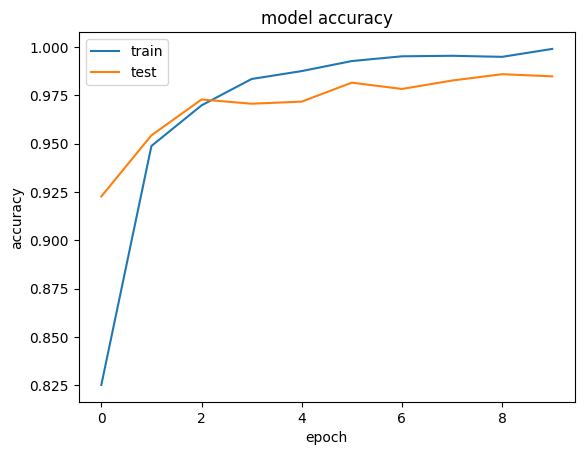

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

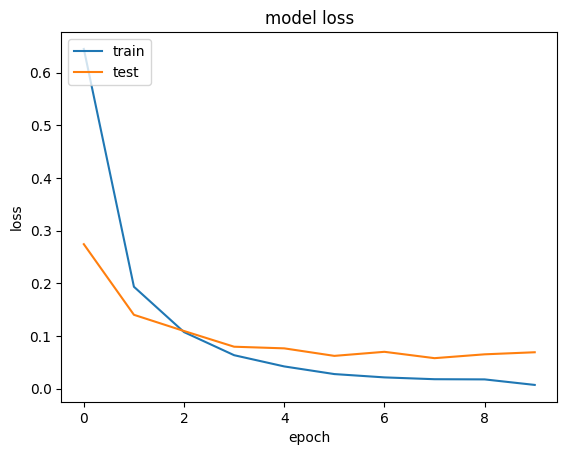

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

O modelo LSTM foi o que apresentou, até agora, os melhores resultados. Com uma acurácia de 0.98 e f1-score médio de 0.93, o modelo aparenta identificar bem os nossos dados. Também foi o modelo que teve a menor variação nos valores de precision e recall. Vale salientar que o seu tempo de treinamento foi praticamente o dobro do CNN e expressivamente maior do que o do SVM.